In [61]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import os                               # for defining files path
import glob                             # for getting list of files in a directory
import csv
import sys

In [62]:
# Load data
path = os.path.join('data/', '*.csv')          # specify path of all csv files to join
files = glob.glob(path)                        # list of all csv files
songs_raw = pd.concat(map(pd.read_csv, files), ignore_index=True)
songs_raw.sample(4)                             # get 4 random rows

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
12258,I Hate the Blues,Dead Moon,spotify:track:5x4DtzIQja1tPIEaH4qVMG,0.494,0.384,5,-11.370,0,0.0558,0.9240,0.332000,0.286,0.457,153.144,154536,3,32.60638,8,0
21693,Artful Dodger,Syd Dale,spotify:track:0Ikop4GzDncLzrzCbvjny5,0.354,0.844,7,-4.680,0,0.0531,0.4690,0.024800,0.342,0.793,109.094,157507,4,46.24191,7,0
9804,Miss You Much,Janet Jackson,spotify:track:4r5VaK6H1bq0cTGPMTN97Z,0.702,0.975,6,-7.968,0,0.0396,0.0305,0.000134,0.165,0.646,115.185,252333,4,30.29471,11,1
18945,The Other Man's Grass Is Always Greener,Petula Clark,spotify:track:1oqpdSW9YqEvZ4LRkQsXNq,0.521,0.565,10,-8.849,0,0.0306,0.5130,0.000000,0.126,0.472,124.678,172907,4,34.82689,9,1


In [63]:
songs_raw.info()            #   quick overview of variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41106 entries, 0 to 41105
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             41106 non-null  object 
 1   artist            41106 non-null  object 
 2   uri               41106 non-null  object 
 3   danceability      41106 non-null  float64
 4   energy            41106 non-null  float64
 5   key               41106 non-null  int64  
 6   loudness          41106 non-null  float64
 7   mode              41106 non-null  int64  
 8   speechiness       41106 non-null  float64
 9   acousticness      41106 non-null  float64
 10  instrumentalness  41106 non-null  float64
 11  liveness          41106 non-null  float64
 12  valence           41106 non-null  float64
 13  tempo             41106 non-null  float64
 14  duration_ms       41106 non-null  int64  
 15  time_signature    41106 non-null  int64  
 16  chorus_hit        41106 non-null  float6

In [64]:
songs_raw.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
count,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,4.110600e+04,41106.000000,41106.000000,41106.000000,41106.000000
mean,0.539695,0.579545,5.213594,-10.221525,0.693354,0.072960,0.364197,0.154416,0.201535,0.542440,119.338249,2.348776e+05,3.893689,40.106041,10.475673,0.500000
std,0.177821,0.252628,3.534977,5.311626,0.461107,0.086112,0.338913,0.303530,0.172959,0.267329,29.098845,1.189674e+05,0.423073,19.005515,4.871850,0.500006
min,0.000000,0.000251,0.000000,-49.253000,0.000000,0.000000,0.000000,0.000000,0.013000,0.000000,0.000000,1.516800e+04,0.000000,0.000000,0.000000,0.000000
25%,0.420000,0.396000,2.000000,-12.816000,0.000000,0.033700,0.039400,0.000000,0.094000,0.330000,97.397000,1.729278e+05,4.000000,27.599792,8.000000,0.000000
50%,0.552000,0.601000,5.000000,-9.257000,1.000000,0.043400,0.258000,0.000120,0.132000,0.558000,117.565000,2.179070e+05,4.000000,35.850795,10.000000,0.500000
75%,0.669000,0.787000,8.000000,-6.374250,1.000000,0.069800,0.676000,0.061250,0.261000,0.768000,136.494000,2.667730e+05,4.000000,47.625615,12.000000,1.000000
max,0.988000,1.000000,11.000000,3.744000,1.000000,0.960000,0.996000,1.000000,0.999000,0.996000,241.423000,4.170227e+06,5.000000,433.182000,169.000000,1.000000


In [65]:
songs_raw.query('tempo == tempo.max()') # fastest song

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
35301,Rock Me,Muddy Waters,spotify:track:0xWjDw2EcrFmpQ2cRBiNLe,0.375,0.689,9,-10.055,1,0.0971,0.815,0.853,0.187,0.613,241.423,230440,3,58.06217,15,0


<Figure size 576x432 with 0 Axes>

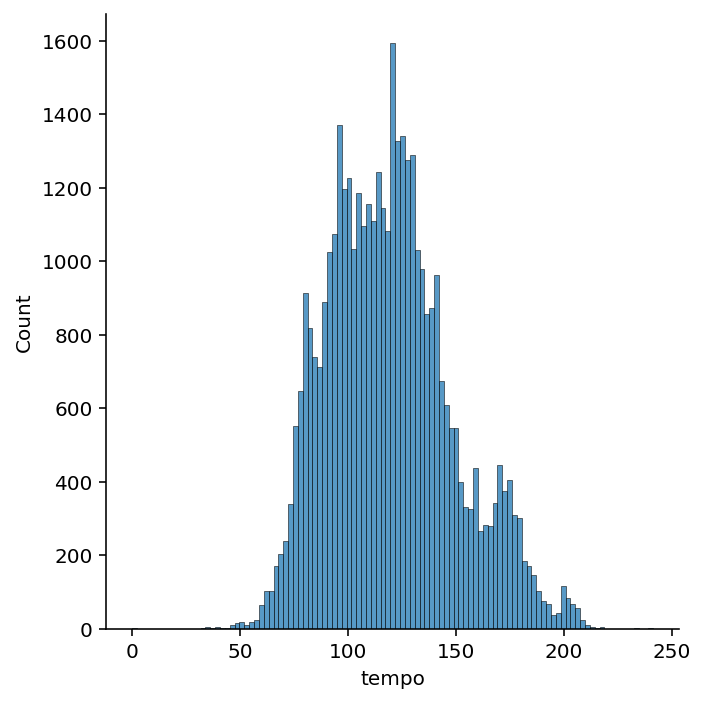

In [66]:
plt.rcParams['figure.figsize'] = (8, 6) # increase default fig size
%config InlineBackend.figure_format = 'retina' # render figures for retina displays on Mac
plt.figure()
sns.displot(songs_raw['tempo'])
plt.show()

In [67]:
songs_raw['key'].value_counts() # number of songs in each key

0     5130
7     4962
2     4619
9     4469
5     3790
4     3323
1     3278
11    2815
10    2728
8     2345
6     2217
3     1430
Name: key, dtype: int64

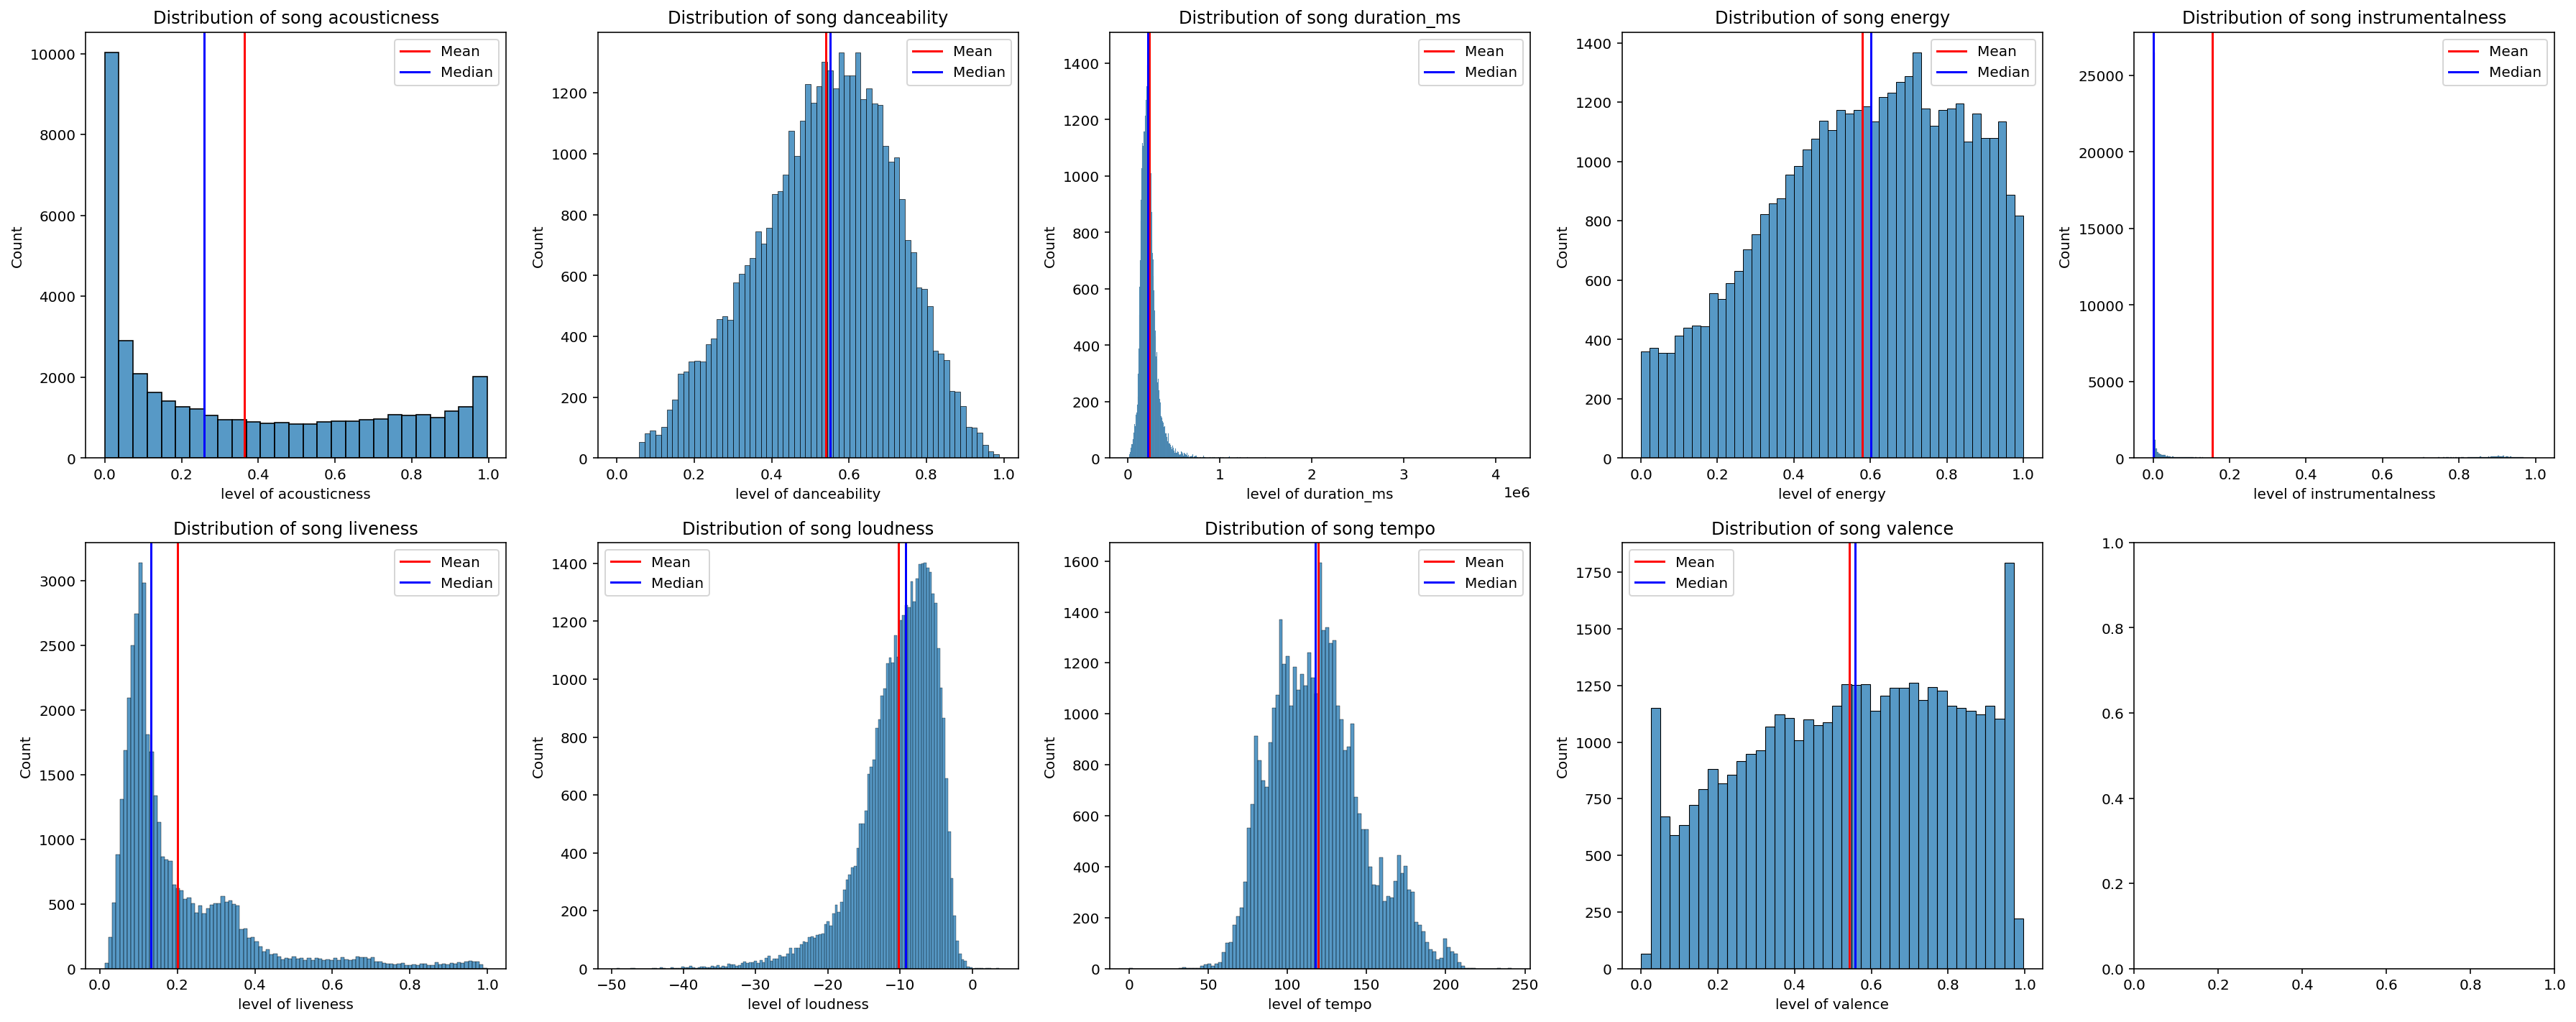

In [68]:
# get most pertinent song statistic column names
cols = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'tempo', 'valence']

# plot variables and descriptive stats
sub_rows = 2
sub_cols = 5
plt.subplots(sub_rows, sub_cols, figsize = (sub_cols*5, sub_rows*5))

subplot_counter = 1             # initializing counter

for col in cols:                # loop through col names to plot

    # get column's mean and median
    var = songs_raw[col]
    var_mean = var.mean()
    var_median = var.median()

    # plot subplot in next logaction in grid
    plt.subplot(sub_rows, sub_cols, subplot_counter)

    # plot histograms
    sns.histplot(var)
    plt.axvline(var_mean, c = 'r', label = 'Mean')
    plt.axvline(var_median, c = 'b', label = 'Median')
    plt.legend()

    # label axes
    plt.xlabel(f'level of {col}')
    plt.title(f'Distribution of song {col}')

    subplot_counter += 1                # add one to counter

plt.tight_layout()                      # ensure subplots do not overlap
plt.show()

